<a href="https://colab.research.google.com/github/evs-11/Clasificaci-n_Validacion-de-Modelos-y-Metricas-de-Evaluacion/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [73]:
import pandas as pd   # importamos la bibliotec

In [74]:
# creamos la variable y leemos el archivo
datos = pd.read_csv('/content/prestacar.csv')

In [75]:
# visualizamos el conjunto de datos
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [76]:
# segmentar nuestro conjunto de datos en nuestra base para poder obtener todos los atributos explicativos de mi variable de respuesta.
X= datos.drop(columns='moroso',axis=1)          # X todas las variables explicativas, desde el ingreso del cliente hasta el cambio de teléfono.
y = datos.moroso                                # Y va a ser únicamente la columna morosos.

In [77]:
# modelo de clasificación de árbol
from sklearn.tree import DecisionTreeClassifier

# creamos el modelo
# cuando no se pasa ningún parámetro da un puntaje de 100%
modelo = DecisionTreeClassifier()    # .fit()se utiliza para entrenar un modelo a partir de las variables explicativas y la variable respuesta.
modelo.fit(X,y)
modelo.score(X,y)                   # la finalidad de comparar las predicciones realizadas por el modelo con los valores reales de los datos y calcula una tasa de acierto en porcentaje llamada exactitud.


1.0

In [78]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [79]:
from sklearn.model_selection import train_test_split   # separa en base de entrenamiento y en base de prueba


Vamos a hacer primero la separación para el entrenamiento y validación y para prueba, y después vamos a hacer la separación de entrenamiento y validación efectivamente. ¿Cómo lo hacemos? Vamos a tomar nuestra X, nuestra X, Test, vamos a tomar nuestra Y y nuestra Y, Test que van a ser los de prueba y vamos a hacer lo siguiente Train, Test, Split. Vamos a introducirle nuestra X, nuestra Y, vamos a tomar una base de prueba Test, Size del 15%, 0.15 y vamos a utilizar el método Stratify.

¿Cuál es el objetivo de hacer este Stratify? Que deje la misma cantidad de observaciones para morosos en los dos conjuntos de datos que estoy separando. ¿Qué quiere decir ello? Que si en mi conjunto de prueba tengo un 10% de morosos, también quiero que en mi conjunto de entrenamiento y validación exista un 10% de morosos. Entonces, esa es la idea y vamos a hacer este Stratify utilizando nuestra Y.

Por último, vamos a establecer un estado de aleatoriedad RandomState y vamos a darle el número 5. El estado de aleatoriedad básicamente nos permite replicar esta misma división en cualquier momento, es decir, la forma en que voy a dividir mis muestras en este ejercicio podrá replicarse en cualquier máquina, porque siempre que utilice el RandomState 5 él va a dividir de la misma manera, por eso se llama un estado de pseudo aleatoriedad.

Vamos a hacer lo mismo pero para la validación. Entonces, vuelvo y tomo mi nueva X y mi nueva Y, ¿verdad? Y en vez de XTEST aquí voy a llamar XVAL y YVAL, ¿ok?

Y aquí, en lugar de dejarlo como X, lo voy a cambiar a XTRAIN y en lugar de dejar Y así, lo voy a cambiar a YTRAIN. De esta manera, ya segmento mis datos para entrenamiento y para prueba. No voy a especificar el tamaño de la prueba porque por defecto es el 25%. Si observas aquí, indica que cuando no se aplica un tamaño de prueba, se configura al 25%, así que lo dejaré así.

In [80]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)

# lo mismo pero para la validación.
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)


In [81]:
# instanciamos el modelo,  no es la mejor forma.
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val,y_val)}')


La exactitud del modelo con el conjunto de entenamiento es: 1.0
La exactitud del modelo con el conjunto de validación es: 0.8497517637836426


In [82]:
# instanciamos el modelo de mejor manera, debemos colocar la profundidad para que no vaya hasta el final
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entenamiento es: 0.9206155632984901
La exactitud del modelo con el conjunto de validación es: 0.9057573382109573


Y ahora observa que ya con este parámetro, durante mi entrenamiento llegó a un 92% y la exactitud del modelo al momento de validarlo fue el 90%. ¿Cuál es la conclusión aquí? Está generalizando mejor. ¿Por qué? Porque no se está memorizando todas las salidas y únicamente ajustamos un parámetro.Entonces aquí ya comenzamos a encontrar el camino para poder hacer nuestra validación del modelo, pero ahora también nos falta evaluarlo.

### Evaluando el modelo

In [83]:
# importamos la matriz de confusión
from sklearn.metrics import confusion_matrix

Crear una variable que llamaremos y_predicha. Y ella va a tomar nuestro último modelo, entonces vamos a hacer modelo.predict y vamos a hacer una predicción con la X de validación.

Después vamos a crear nuestra matriz de confusión que va a tomar nuestra confusion_matrix, que recibe la Y de validación y la y_predicha. Entonces, hace esa comparación de los valores reales. La Y de validación es el valor real y la y_predicha es la que estamos prediciendo a través del modelo. Y vamos a hacer un print de la matriz de confusión.

In [84]:
# creamos una variable y ella toma el último modelo.
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10357   122]
 [  960    42]]


Observa que me devolvió una matriz, pero no sé realmente estos valores. 10,356, 123, 957, 45. ¿Pero qué? ¿Qué es qué? Entonces, para ello vamos a continuar aquí importando recursos. From sklearn.metrics import confusion_matrix display, que nos va a permitir dibujar nuestra matriz de confusión.

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

Vamos a crear una variable que llamaremos visualizacion y ella recibe nuestra matriz de confusión. Y vamos a dar visualizacion.plot(). Abrimos y cerramos paréntesis, colocamos punto y coma, porque si no tendríamos que importar matplotlib para hacer un plt.show. Aquí con el punto y coma ya directamente se abstrae esa parte.
Tenemos nuestra matriz de confusión. En el eje Y tenemos los valores reales, 0 siendo cumplido, 1 siendo deudor. Y aquí en el eje X tenemos los valores previstos, 0 siendo cumplido y 1 siendo deudor.

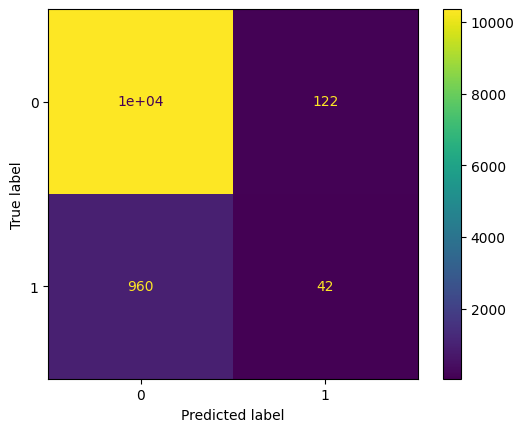

In [86]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot();

Voy a tomar aquí nuevamente, porque está un poco difícil aún de leer, y voy a colocar aquí los parámetros mejor. Confusion_matrix es igual a matriz de confusión. Y también voy a colocar los labels. Display_labels. Y los coloco en una lista de Python. Entonces, el primer label va a ser cumplido, que el cliente es cumplido, y el otro label va a ser deudor.

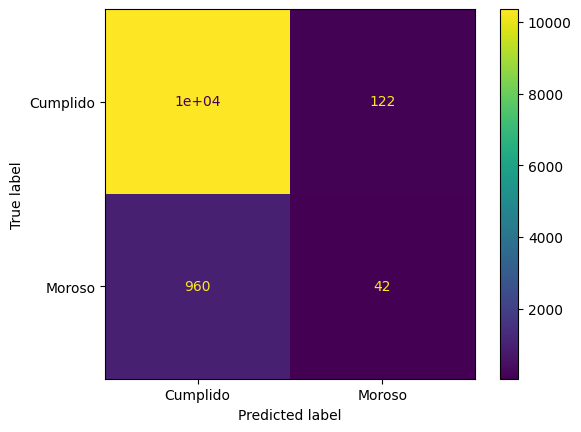

In [87]:

visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion,display_labels=['Cumplido','Moroso'])
visualizacion.plot();


**¿Qué quiere decir mi matriz de confusión?** Que de mi modelo, predijo cumplidos de todo el conjunto de datos, al momento de validar, más de 10,000 clientes de forma correcta. Sin embargo, hubo 957 clientes que mi modelo dijo que eran cumplidos, pero en realidad eran deudores. Es decir, 957 clientes fueron clasificados como clientes cumplidos, pero en realidad eran deudores.
Entonces, existe un riesgo muy grande aquí. Y en este lado, ¿verdad? Lo mismo sucede con los morosos. Mi modelo indicó que 123 clientes eran morosos, cuando en realidad eran cumplidos. Y solo identificó a 45 de estos morosos, ¿verdad? Es decir, solo clasificó de manera efectiva a 45 clientes morosos como morosos. Y de manera efectiva, más de 10,000 clientes cumplidos como cumplidos.

Estos números aquí, digamos, son los que nos permitirán trabajar con nuestro modelo para mejorarlo. Porque definitivamente queremos priorizar los casos en los que nuestro cliente realmente es moroso. Y no decir, por ejemplo, que es un cliente moroso cuando en realidad es cumplido. Entonces, dejaría de prestarle a 123 personas o a 123 clientes que me iban a pagar bien. Y estoy prestando a 957 clientes que no me van a pagar bien. Entonces, aquí, digamos, se está asumiendo un riesgo muy grande. Potencialmente, ¿no? Estamos hablando potencialmente.

###**Entendiendo la matriz de confusión**

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.
Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.
.Verdaderos Negativos (VN): Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.

.Falsos Positivos (FP): Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.

.Falsos Negativos (FN): Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.

.Verdaderos Positivos (VP): Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.


## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

Tenemos verdaderos negativos en este primer cuadrante, que son los casos donde el valor real era cero, es decir, cumplido, es un cliente cumplido, cero. Y el valor predicho era cero, es decir, verdadero negativo. Realmente este es un cliente cumplido, verdadero negativo, que fueron más de 10.000.

También tenemos el caso donde el valor real era cero, pero yo predije que era un cliente moroso, entonces es un falso positivo, es decir, es un falso 1, es un falso moroso porque realmente este es cumplido. El falso positivo se conoce como error tipo 1.

Además, en este tercer cuadrante tengo los valores reales cuando es moroso, es decir, cuando es 1. Entonces, 1, y mi modelo dijo que era cumplido, es decir, que era cero, entonces es un falso negativo, es decir, yo lo predije como cero, falsamente, falso negativo, entonces tengo un error tipo 2. Hubo 957 casos donde mi modelo dijo que eran clientes cumplidos cuando en realidad eran morosos.

Este número es muy importante. Y también tenemos los verdaderos positivos, que son los casos en los cuales el modelo efectivamente predijo clientes morosos que sí realmente eran morosos, entonces nota que únicamente hubo 45. Ya viendo estos números sin necesidad de entrar en fórmulas, ya sé que mi modelo no está generalizando bien.

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

Las métricas que vamos a calcular, que son precisión, recall, y F1 score. Accuracy, o exactitud, que es la primera métrica que utilizamos que era score, ella únicamente suma verdaderos positivos y verdaderos negativos, es decir, suma estos 10,000, más de 10,000, más estos 45, y los divide en el total de observaciones, es decir, sumando todo, sumando todos estos cuadritos.

Entonces, lógicamente, si aquí tengo 10,000 y aquí tengo 45 y únicamente le estoy sumando 1,000 más, entonces el número va a quedar alrededor del 90%, es decir, 10,000 sobre 11,000, ¿sí? , algo así. Entonces yo no voy a entrar aquí a hacer cálculos en mi mente, pero para que utilicemos los recursos de Scikit-learn, entonces vamos a importar estas métricas.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


Qué es la precisión? Verdaderos positivos, es decir, true positive (verdadero positivo), 45, es decir, en 45 casos que él identificó que realmente eran morosos, dividido entre verdaderos positivos más falsos positivos, es decir, dividido entre este valor más este valor, entonces 45 sobre 45 más 123.
Voy a hacerlo aquí a mano antes de usar la biblioteca.

In [89]:
# precisión
45/(45+123)

0.26785714285714285

Tengo la precisión, tengo la sensibilidad, que es el mismo recall (recuerdo), voy a colocar aquí entre paréntesis recall. Entonces, ¿cómo es el recall? Aquí solo cambio, en vez de precisión, coloco recall, y la exactitud. Entonces, la exactitud aquí sería accuracy, del modelo es accuracy score. Entonces, voy a hacer esta impresión aquí. La precisión de mi modelo es exactamente el número que les mostré aquí, el mismo cálculo lo hizo para recall, la sensibilidad. ¿Qué quiere decir esto? Que tiene un 4% de sensibilidad. ¿Por qué? ¿Cómo calcula la sensibilidad? Toma los verdaderos positivos, ¿verdad? Y los divide entre el valor de verdaderos positivos más falsos negativos, o sea, 45 dividido entre 45 más 957.



In [90]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall)  del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')


La precisión del modelo es: 0.25609756097560976
La sensibilidad (Recall)  del modelo es: 0.041916167664670656
La exactitud (accuracy) del modelo es: 0.9057573382109573


Entonces, ¿qué quiere decir esto? Estoy prestando dinero, o la financiera, la empresa financiera está financiando a muchas personas morosas, entonces esto es un problema muy serio. La métrica de validación que se va a utilizar, la que vamos a mejorar es el recall. Queremos disminuir al máximo el error tipo 2, y vamos a ver solo como referencia el F1 score, solo para tenerlo como referencia

Entonces, voy a copiar aquí, pegar, el F1 score del modelo, que penaliza a mi modelo. ¿Qué hace? Toma, ¿verdad? dos veces la precisión por el recall, dividido entre la precisión más el recall. Entonces, penaliza a mi modelo, voy a tener también seguramente un valor cercano, aquí puse accuracy, es el F1, un valor cercano a 0, ok. Entonces, 0.076, o sea, mientras más lejos de 1, quiere decir que el modelo está desempeñándose muy mal.

In [91]:
print(f'El F1-scorre del modelo es: {f1_score(y_val,y_previsto)}')

El F1-scorre del modelo es: 0.07204116638078903


###**Cuándo usar cada métrica**

Evaluar de manera adecuada el desempeño de un modelo de machine learning es esencial para asegurar que el modelo está resolviendo el problema de negocio que necesita ser solucionado. Existen diversas métricas que pueden ser utilizadas para evaluar el desempeño de los modelos de clasificación, cada una de ellas tiene ventajas y limitaciones. Estas métricas se calculan a partir de la comparación entre las clasificaciones realizadas por el modelo y los valores reales de la base de datos. Por lo tanto, pueden ser extraídas a partir de una matriz de confusión. Las principales métricas de clasificación son:

**Exactitud**

Es la métrica más común y básica en problemas de clasificación. Se utiliza para medir la proporción de datos previstos correctamente por el modelo en relación al total de los datos. Esta métrica es útil cuando las clases de la variable objetivo están balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia equivalente de clasificación entre las categorías. Como ejemplo de utilización, tenemos el reconocimiento de dígitos manuscritos. Podemos utilizar imágenes de caracteres de letras y números para entrenar un modelo de clasificación para identificar correctamente la escritura. Como cada letra o número no tiene una importancia mayor que los demás, la exactitud se convierte en una buena métrica para medir la capacidad del modelo en clasificar correctamente los dígitos.

**Recuperación (recall)**

Mide la proporción de datos positivos que fueron correctamente identificados por el modelo, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar falsos negativos es alto. Por ejemplo, en casos de diagnóstico de enfermedades graves, donde es fundamental detectar correctamente la presencia de la enfermedad.

A continuación, podemos constatar el cálculo del recall a partir de la matriz de confusión. El recall solo toma en cuenta los valores positivos reales, es decir, los valores de la segunda fila de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos reales (VP + FN).

**Precisión**

Mide la proporción de datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar falsos positivos es alto, por ejemplo, en casos de selección de acciones en el mercado financiero, donde lo importante es seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos) incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo). La precisión también es importante en el ejemplo de detección de enfermedades, donde queremos evitar que pacientes sanos sean erróneamente clasificados como enfermos.

A continuación, podemos analizar el cálculo de la precisión a partir de la matriz de confusión. La precisión solo toma en cuenta los valores positivos previstos por el modelo, es decir, los valores de la segunda columna de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos previstos (VP + FP).

**F1-Score**

Proporciona un equilibrio entre el recall y la precisión, siendo útil cuando las clases de la variable objetivo están desbalanceadas, es decir, cuando hay una cantidad de datos muy diferente para cada clase. Además, es aplicable cuando el riesgo o costo de falsos positivos y de falsos negativos es alto simultáneamente. En casos de detección de tumores en pacientes, es necesario tener un equilibrio entre evitar errores en la detección de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando en realidad no lo tiene.

El cálculo del F1-Score se realiza a partir de la media armónica entre la precisión y el recall. Por lo tanto, equivale a 2 veces la precisión por el recall, dividido por la suma entre la precisión y el recall

### Curva ROC

¿cómo se interpreta? Este color mostaza, que tengo aquí en mi gráfica, representa los verdaderos negativos. Este, que es como un mostaza más claro, falsos positivos. Este, azul, aguamarina, o azul claro, sería falsos negativos. Y este, azul, que es como un azul oscuro, verdadero positivo. Aquí tengo mi predictor. ¿Qué quiere decir esto? Este es como mi árbol de decisión de profundidad 10, que instancié y quedó así mi modelo.

A través de las Características Operativas del Receptor, lo que hago es ajustar mi modelo para priorizar una métrica sobre la otra. Entonces, volviendo a nuestra gráfica de la Matriz de Confusión, tengo esta métrica que son los morosos, es decir, los verdaderos positivos. Quiero que cuando sean morosos, mi modelo sea capaz de hacer una previsión correcta de que es moroso. Pero mi modelo, únicamente predijo 45 personas morosas y hubo personas que eran morosas, ¿verdad? 957, casi el 95% de las observaciones del total de morosos de la base fueron clasificados como cumplidos.

Entonces, ¿qué quiere decir esto? Que el 95% de las veces mi modelo está prestando a personas o potencialmente me va a llevar a hacer préstamos a personas que no van a pagar. Entonces, lo que quiero es disminuir el error tipo 2, es decir, aumentar mi puntaje de RECALL. Es decir, que tenga más identificados los morosos, es decir, que ya no sean 45, sino que en la medida de lo posible pueda maximizar la identificación o la clasificación de clientes morosos.

¿Cuál es el trade-off o a cambio de qué? Entonces, nota que también tengo una tasa de falsos positivos, que es el error tipo 1. Entonces, aquí tengo falsos positivos, ¿verdad? Y en la medida que identifique más morosos, lógicamente, mi número de falsos positivos va a aumentar y el número de personas cumplidas, que fue clasificada como cumplida, es decir, verdaderos negativos, va a disminuir porque estos valores van a ser, es decir, la suma de todos estos valores no va a cambiar. Lo único que se va a modificar es la distribución, como los voy a dejar clasificados al final.

Entonces, voy a disminuir a los cumplidos, los voy a volver falsos positivos para poder identificar a los morosos. Entonces, seguramente dejaré de recibir dinero de personas cumplidas, es decir, dejaré de hacer préstamos porque los voy a clasificar mal, siendo falsos positivos, a cambio de identificar a más morosos.

Entonces, la curva ROC, volviendo nuevamente a este gráfico, pensemos que este azul oscuro son los verdaderos positivos, es decir, los morosos. Entonces, en la medida que identifique más morosos, nota que también comienzo a sacrificar de este lado a personas. Es decir, digamos, me vengo aquí, clasifiqué a los 900 morosos de forma correcta, pero si trazo esta recta hasta arriba, esto quiere decir que voy a tener toda esta cantidad de falsos positivos, ¿verdad?, de mi base.

Entonces, si tengo una base de 10,000 personas, quiere decir que, para poder clasificar correctamente a mis 900 morosos, voy a sacrificar 9,000 personas de la base de datos que son cumplidas. Entonces, eso realmente es un problema, porque dejé de hacer préstamo a 9,000 personas para identificar a 900, tampoco es la idea. La idea es encontrar en qué parte dejo ajustado mi modelo, ¿verdad?, en qué parte coloco esta recta para maximizar mi RECALL sin, digamos, afectar la precisión de mi modelo.

Entonces, el área bajo la curva, ¿verdad? Me ayuda a identificar este caso. Mientras más cerca esté a este lado, lógicamente, mejor para mi modelo, pero a cambio de qué, ¿verdad? ¿Cuál es el tradeoff (compensación)?

La curva AUC, en el mejor de los casos, es 100%. De esta forma, con Python y Scikit-Learn, podemos medir cómo está la curva AUC de nuestro modelo.

In [92]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [93]:
from sklearn.metrics import  RocCurveDisplay

La curva AUC, en el mejor de los casos, es 100%. De esta forma, con Python y Scikit-Learn, podemos medir cómo está la curva AUC de nuestro modelo.

Entonces, from Scikit-Learn.metrics import curve, es ROC curve, ROC curve display, vamos a graficarlo. Aquí simplemente hacemos la curva ROC, ROC curve display from predictions, de la predicción que ya hicimos, y colocamos nuestra Y real, es decir, Y val, coma, nuestra Y prevista, Y previsto, y vamos a darle un título a nuestra gráfica, entonces, sería árbol de decisión. Y ponemos un punto y coma para que ya grafique.

Observa, la curva ROC de nuestro modelo solo aumentó un poco en esta región, y ya se fue aquí recta. ¿Qué quiere decir esto? Mientras más cerca esté aquí, es decir, esto significa aleatoriedad, 50-50, es producto de la aleatoriedad. Entonces, esto tampoco sirve, quiere decir que el modelo no está generalizando ni encontrando a las personas, ni clasificando bien.

Este modelo, lógicamente, con la curva ROC, a pesar de que diga que tiene una exactitud del 90%, queda claro que es un modelo deficiente.

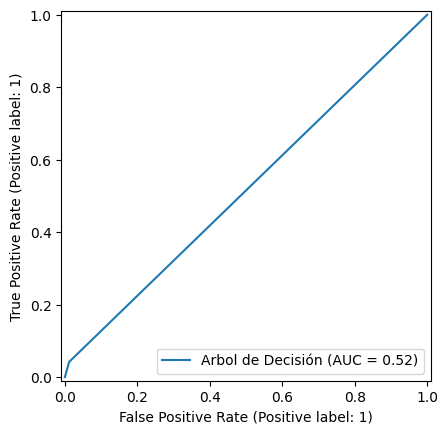

In [94]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Arbol de Decisión');  # punto y coma para que grafique


In [95]:
from sklearn.metrics import roc_auc_score     # se llama ROC-AOC-score, porque ya tenemos la curva, ahora nos falta el puntaje.


Aquí hacemos un print, printf, de formato, el área bajo la curva. ROC es, entonces, los puntos, abrimos y cerramos llaves, y colocamos ROC-AOC-score, y él también recibe la Y-real, que sería Y-val, y la Y-prevista, Y-previsto.

Vemos que el valor es 0.516. Aquí ya lo redondeo a 0.52. Pero entonces, esta es una forma de validar nuestro modelo.


In [96]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es: 0.5151369176905278


### Curva de  precisión x sensibilidad

In [97]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


Aquí tengo diversos tipos de modelos de Machine Learning. Por ejemplo, un predictor clasifica de esta forma, otro predictor de esta forma, de esta forma, de esta forma. El predictor ideal es cuando logra aislar bien y determinar de forma perfecta o clasificar mejor de forma perfecta a cada categoría, entonces, morosos de un lado y cumplidos de otro. Supongamos que morosos es azul y cumplidos de rojo. El modelo ideal, es el que permite clasificarlos bien, y nota que la curva se acerca más a 1, mientras que cuando están sobrepuestos es todo producto de la aleatoriedad, puede ser el uno o el otro, entonces, por eso notas estos puntitos es cada una de las observaciones del modelo, entonces, cuando está sobrepuesto, quiere decir que está todo como aleatorio, está todo como mezclado.

Entonces, aquí está todo mezclado y por eso queda este valor de área bajo la curva tan bajito, pero a medida que logramos aislar bien o separar bien cada una de estas clases, lógicamente, mi modelo va a ser mucho mejor.

In [98]:
from sklearn.metrics import PrecisionRecallDisplay

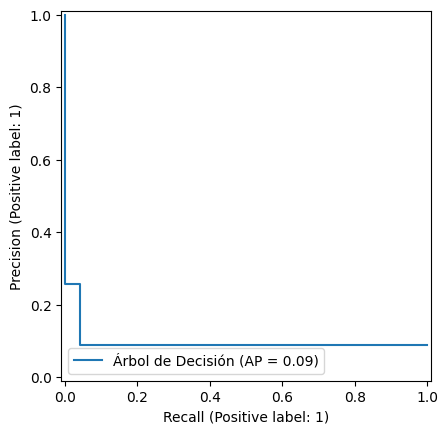

In [99]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión');  # punto y coma para gráficar


es una curva también que nos permite ver la precisión y el recall, entonces, mira cómo quedó, él quedó como más preciso nuestro modelo, aquí está el 26% que vimos de precisión y el 4% que tiene de recall, entonces, el árbol de decisión, o sea, el promedio, el promedio del average precision recall es 0.10, o sea, la idea es que el promedio quede en 1, pero 0.10 es deficiente.

In [100]:
from sklearn.metrics import average_precision_score

In [101]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto)}')
# da 10 %

El score promedio de precisión vs recall es: 0.0943510380247745


### Informe de métricas

Podemos también utilizar un recurso que es un informe de métricas, que va a traer todos estos resultados ya consolidados para que podamos analizar directamente desde un mismo lugar.
El informe presenta la precisión, recall y f1-score de cada clase, además de devolver un promedio de estas métricas de forma general o ponderada en relación a la cantidad de datos de cada clase.

Entonces, vamos a importarlo.

In [102]:
from sklearn.metrics import classification_report

In [103]:
# instanciamos directamente
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



Tenemos el siguiente informe. Tenemos el informe con la precisión, el recall o la sensibilidad, el score F1 y support, que es la cantidad de muestras que soportan estos valores. De entrada, tengo aquí la clase 0, que son las personas clientes cumplidas, ¿verdad? Y la clase 1, que son las personas clientes que no pagan, o sea, las morosas. Entonces, cumplidas es 0, morosas es 1.

¿Qué sucede? Cuando hace este análisis, hace el cálculo basado en el total de observaciones, que son 11,481, ¿ok? Y nota que existe una clase predominante, que son las personas clientes buenas. O sea, más del 90% del conjunto de datos está compuesto por personas que pagan bien. Entonces, la tendencia del modelo, lógicamente, como es la clase mayor, es a clasificar correctamente a las personas clientes cumplidas, ¿ok?

Por eso tengo una precisión de 0.92, ¿verdad? Porque está tomando 10,479 dividido entre 11,481, ¿ok? Entonces, tengo esta precisión alta para la clase 0, que son las cumplidas. Para la clase 1, estoy tomando 1,002 sobre 11,481. Entonces, por eso ya tengo un valor mucho menor. ¿Por qué? Porque ya estoy tomando una clase desbalanceada, ¿ok? Aquí, de entrada, veo que no tengo un equilibrio entre las clases. Entonces, eso puede, lógicamente, afectar mi modelado.

Tengo los puntajes de precisión, de recall, para cada una de las clases. Y, como estamos trabajando con recall, nota que este recall de 0.04 es, pues, deficiente, muy bajo. Y la precisión, también, de 0.27, pues, muy mal, ¿ok? Entonces, este modelo, realmente, no identificó bien a las personas morosas, porque en las personas morosas es lo que estamos tratando de clasificar.

También, en la parte inferior, tenemos la exactitud. A pesar de aparecer el puntaje de exactitud de 0.91, ¿verdad? Bajo F1 score, realmente, es la exactitud. O sea, está tomando, haciendo la medida, como los cálculos que previamente mostramos. Entonces, es del 91%, pero eso no quiere decir que mi modelo esté clasificando bien, ¿ok? Entonces, es un punto muy importante.

También, tenemos el promedio general, ¿verdad? Que es lo que toma, es el valor de precisión. Lo suma y lo divide entre 2. Y lo mismo aquí para recall. Entonces, nota que el promedio general para la precisión es 0.59. Para recall, 0.52. El F1 es 0.51, siempre tomando como referencia las 11,500 muestras que tengo en el conjunto de entrenamiento y validación.
Y el promedio ponderado, ¿verdad? Adicionalmente, tiene en cuenta las muestras, ¿ok? Entonces, en este caso, el promedio ponderado es calculado precisión veces soporte, ¿verdad? Dividido por la cantidad de muestras que hay. Y lo mismo para la clase 1. Entonces, precisión veces soporte dividido por la cantidad de muestras. Entonces, aquí, este desbalanceo hace que lleguemos a estos promedios ponderados que acaban favoreciendo la clase más frecuente, que serían las personas clientes cumplidas.
Este informe de métricas es bastante útil. Sin embargo, no es la única manera de validar nuestros modelos. Hay, inclusive, otros pasos de validación muy interesantes, porque hasta el momento lo único que hemos hecho es validar este modelo inicial sin realizar ningún ajuste a él, sino entender muy bien las métricas que nos ofrece para, a partir de allí, entonces ver qué es lo que podemos hacer para mejorar nuestro modelo de clasificación.

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [104]:
from sklearn.model_selection import KFold, cross_validate

 Hacemos la validación cruzada y el KFold. Lo siguiente es que vamos a recrear nuestro modelo. El modelo va a ser un clasificador de árbol de decisión Decision Tree Classifier y vamos a establecer la misma profundidad maxDepth igual a 10.

Ahora sí vamos a crear nuestro KFold. Entonces, KF, vamos a llamarlo KF, es igual a KFold y nuestro KFold recibe lo siguiente. Él recibe la cantidad de divisiones nSplits que va a ser igual a 5. Él recibe también, si queremos, que se mezcle. Entonces, hacemos un shuffle igual a true. Hace un shuffling (mezcla) y, por último, él necesita un estado de aleatoriedad para poder reproducir esta misma división de los segmentos de datos para entrenamiento y para validación.

Ahora viene la validación cruzada. Entonces, lo llamaremos crossValidation. Entonces, sería como mejor se ve resultadosCrossValidation que sería igual a crossValidate y que recibe él. Él va a recibir el modelo, que es el estimador. Entonces, va a ser el modelo, va a recibir nuestra X, va a recibir nuestra Y y va a recibir también, como queremos, esa validación cruzada. Y utilizamos nuestro KFold. Él nos devuelve un diccionario. Entonces, hago cvResultados.
Él se demoró un poco porque él hace todas las iteraciones segmenta, inclusive él muestra el tiempo que demoró para hacer el fit del modelo. Entonces, demoró .43, .79, .43, .48, .33. Ahí está lo que demoró. Después, el tiempo que demoró para establecer el puntaje, ¿verdad? Y por último, el puntaje en sí.
¿El puntaje cuál? La exactitud.

In [105]:

modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultado = cross_validate(modelo,X,y,cv=kf)
cv_resultado

{'fit_time': array([0.2476294 , 0.2281723 , 0.22281647, 0.22721624, 0.24141097]),
 'score_time': array([0.00345182, 0.00343466, 0.00331116, 0.00328088, 0.00339603]),
 'test_score': array([0.91268372, 0.90733885, 0.90766551, 0.91343641, 0.89906359])}

 Se trata de la llave que se llama testScore. TestScore. Entonces, vemos aquí el resultado. Entonces, en cada una de las iteraciones. Por ejemplo, en este primer caso, el resultado fue 0.91. En este segundo caso, el resultado fue 0.90.

Y así sucesivamente.

In [106]:
cv_resultado['test_score']

array([0.91268372, 0.90733885, 0.90766551, 0.91343641, 0.89906359])

 ¿Cómo estimo si está generalizando bien? ¿Y cuál es el intervalo de confianza? Entonces, necesito calcular el promedio. ¿Verdad? De todos estos valores. Que es la suma de todos estos resultados, dividido entre 5. Lógicamente, el promedio. Y después, la desviación estándar. ¿Sí? Entonces, con la desviación estándar, voy a calcular el intervalo de confianza. Que va a ser igual al promedio, menos dos veces la desviación estándar. ¿Verdad? Y esa es la parte inferior. Y la parte superior va a ser el promedio, más dos veces la desviación estándar. Y, lógicamente, asegurándonos de que la parte superior del intervalo de confianza no supere 1. Porque el valor máximo es el 100%. ¿Ok?

Vamos a hacer promedio. Entonces, promedio es igual a, precisamente, la media de este array. Entonces, mean. La desviación estándar. A ver. Mean. La desviación estándar. Vamos a ponerlo aquí. Desvío. STD. Va a ser igual también a CVResultado.STD. ¿Ok? Y ahora, vamos a colocar aquí mejor. Bueno, todo aquí en la parte inferior. No pasa nada. Print. Abrimos y cerramos paréntesis. Format. Entonces, colocamos el promedio de la exactitud es de los puntos. Entonces, colocamos promedio. Lo mismo vamos a colocar para la desviación estándar. La desviación estándar es de desvío estándar. Y, por último, aquí quedó como desvío. Listo.

Y, por último, el intervalo de confianza. El intervalo de confianza es, aquí abro corchetes y coloco aquí una coma, vuelvo y abro llaves y coloco de nuevo corchete para cerrar. Entonces, dijimos que es el promedio menos dos veces la desviación estándar. Y la parte superior es el promedio más dos veces la desviación estándar. ¿Ok? Pero, puede ser que hay casos en los cuales el promedio es 0.99, o sea, está casi llegando al 100% y la desviación estándar es, por ejemplo, de 0.02. Entonces, ¿qué sucede? El intervalo de confianza va a superar el 1. Y eso no lo podemos permitir. El máximo es 1. Entonces, en el mejor de los casos va a ser 1. Entonces, voy a tomar el valor mínimo, ¿verdad? De este límite superior del intervalo de confianza.

In [107]:
promedio = cv_resultado['test_score'].mean()
desvio_std = cv_resultado['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvio típico es de: {desvio_std}')
print(f'El intervalo de confianza es de: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')


El promedio de la exactitud es de: 0.9080376157725727
El desvio típico es de: 0.005136014155211102
El intervalo de confianza es de: [0.8977655874621505,0.9183096440829949]


### Validación cruzada con sensibilidad

Vamos a hacer promedio. Entonces, promedio es igual a, precisamente, la media de este array. Entonces, mean. La desviación estándar. A ver. Mean. La desviación estándar. Vamos a ponerlo aquí. Desvío. STD. Va a ser igual también a CVResultado.STD. ¿Ok? Y ahora, vamos a colocar aquí mejor. Bueno, todo aquí en la parte inferior. No pasa nada. Print. Abrimos y cerramos paréntesis. Format. Entonces, colocamos el promedio de la exactitud es de los puntos. Entonces, colocamos promedio. Lo mismo vamos a colocar para la desviación estándar. La desviación estándar es de desvío estándar. Y, por último, aquí quedó como desvío. Listo.

Y, por último, el intervalo de confianza. El intervalo de confianza es, aquí abro corchetes y coloco aquí una coma, vuelvo y abro llaves y coloco de nuevo corchete para cerrar. Entonces, dijimos que es el promedio menos dos veces la desviación estándar. Y la parte superior es el promedio más dos veces la desviación estándar. ¿Ok? Pero, puede ser que hay casos en los cuales el promedio es 0.99, o sea, está casi llegando al 100% y la desviación estándar es, por ejemplo, de 0.02. Entonces, ¿qué sucede? El intervalo de confianza va a superar el 1. Y eso no lo podemos permitir. El máximo es 1. Entonces, en el mejor de los casos va a ser 1. Entonces, voy a tomar el valor mínimo, ¿verdad? De este límite superior del intervalo de confianza.

In [108]:
def intervalo_confianza(resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  return(f'El intervalo de confianza es de: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')


Creamos nuestra función y ahora vamos a hacer este mismo ejercicio con el mismo modelo. Copiamos, lo pegamos y aquí la diferencia es que vamos a dar el parámetro scoring y scoring va a ser recall. Entonces, de esta manera, estoy de nuevo creando mi modelo y voy a calcular este scoring con el recall directamente.

Y nota que ya me da estos resultados de recall: 0.25, 0.21, 0.19, 0.14, 0.21. Entonces vamos a ver el intervalo de confianza. Entonces sería intervalo de confianza y este recibe como parámetro cv_resultados.

In [109]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultado = cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultado

{'fit_time': array([0.24317813, 0.22378659, 0.22318864, 0.23365545, 0.25311613]),
 'score_time': array([0.00786519, 0.00578308, 0.00567174, 0.01274824, 0.00561714]),
 'test_score': array([0.02906209, 0.01980198, 0.01845018, 0.01697128, 0.02543353])}

In [110]:
intervalo_confianza(cv_resultado)

'El intervalo de confianza es de: [0.012806332467243787,0.0310812904411783]'

Ejecutamos entonces aquí la validación cruzada para la sensibilidad. Funciona exactamente igual a los pasos anteriores y lo único que hacemos es colocar aquí el tipo de puntaje que vamos a utilizar que es el recall. Y nota que tiene un desvío estándar bastante grande porque varía de 0.13 a 0.27.

Entonces, ese es el resultado para recall que fue la métrica que estábamos priorizando. Recuerda que este modelo sigue siendo deficiente, no hemos trabajado en mejorar el modelo. Lo único que hemos hecho hasta ahora es validarlo, utilizar diversas técnicas para la validación con diversas métricas de modo que podamos tomar acciones basados en los resultados que seamos data driven.

### Estratificando los datos

In [111]:
datos['moroso'].value_counts()
# son 49309 muestras como cumplidos y 4716 morosos

,count
moroso,
0,49309
1,4716


In [112]:
datos['moroso'].value_counts(normalize=True)   # vemos la proporción, el porcentaje

# 91% clientes cumplidos y 9% clientes morosos

,proportion
moroso,
0,0.912707
1,0.087293


Si observamos rápidamente la cantidad de personas morosas y cumplidas, entonces voy a tomar mis datos, morosas y doy un valueCount (conteo de valores), entonces tengo 4.716 morosas y 49.309 cumplidas. Entonces, ¿qué significa esto? Que más del 90% de mis datos pertenecen a una misma clase y el resto a otra clase, por lo que mi dataframe está muy desequilibrado.
Cuando hicimos estos splits, no nos aseguramos de que se mantuviera la misma proporción de muestras. Por ejemplo, en este split es probable que haya quedado el 5% de la clase morosa y el 95% de la clase cumplida y en este grupo podría haber quedado el 100% de la clase cumplida y nada de morosa. Entonces, corremos el riesgo de que nuestro algoritmo aún no esté haciendo una validación cruzada efectiva.
Podemos utilizar otro recurso de Sklearn que es un método estratificado de KFold. Entonces, from sklearn.modelSelection import stratified kfold, lo importamos y los pasos son exactamente iguales a los que ya hemos realizado.

In [113]:
from sklearn.model_selection import StratifiedKFold

In [114]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultado = cross_validate(modelo,X,y,cv=skf,scoring='recall')
cv_resultado

{'fit_time': array([0.22775578, 0.2240262 , 0.22824144, 0.24844933, 0.23129511]),
 'score_time': array([0.00568151, 0.00544   , 0.00648975, 0.00560498, 0.00581765]),
 'test_score': array([0.03491272, 0.02746567, 0.02992519, 0.02369077, 0.02493766])}

En vez de utilizar kfold va a ser stratified kfold. Entonces, stratified kfold, la misma cantidad de splits, que también haga el shuffling y el random state igual a 5.

Aquí estoy garantizando que la proporción de cada clase se mantenga. Quiero que en todos estos grupos, independientemente de cómo queden, todos tengan un porcentaje aproximado de la clase morosa. Si, por ejemplo, quedó el 10% moroso en cada uno de los grupos, entonces, estaría bien.
Por último, hacemos esta validación, utilizamos el SKF (nuestro stratified kfold) y lo almacenamos en resultados.


In [115]:
intervalo_confianza(cv_resultado)

'El intervalo de confianza es de: [0.020208872394152293,0.03616392843772556]'

Aquí no necesitamos ver los resultados directamente, sino que podemos ya utilizar nuestra función de intervalo de confianza. Entonces, intervalo confianza va a recibir los resultados, se ven resultados, entonces, ejecutamos nuestra celda y notamos que el intervalo de confianza, lógicamente, tuvo un cambio significativo porque en el primer caso la variación fue de 0.13 a 0.27 y en este caso ya fue de 0.012 a 0.030.
Entonces, el desvío típico aumentó, pero a principio, estoy obteniendo un intervalo de confianza con una variación que con este modelo puede presentar una puntuación de recall que va a variar entre el 0.018, o sea, 1.2%, casi 2% y el 3.9 %, no puede esperar más de ello con este modelo.
Aquí notamos un detalle muy interesante y es que estamos lidiando con un conjunto de datos desequilibrado, un conjunto de datos en el que tengo 50.000 registros que son personas cumplidas y tengo casi 5.000 que son personas morosas. Entonces, detectar a estas personas morosas de esta forma es muy difícil. ¿Qué estrategia podríamos implementar, entonces, para mejorar nuestra previsión?

###**Otros métodos de validación**

**GroupKFold**

El método GroupKFold es una variación de la validación cruzada KFold tradicional y se utiliza cuando los datos tienen alguna estructura de grupo o dependencia que no debe ser rota, generalmente una característica en una de las columnas de la base de datos.

Este enfoque utiliza una estrategia de separación de los datos para que los registros pertenecientes a un grupo específico se mantengan juntos durante las divisiones del KFold, garantizando que no sean separados entre los conjuntos de entrenamiento y validación. Esto es útil para evitar posibles sesgos y garantizar que el modelo generalice para grupos desconocidos, es decir, incluso si no hay datos del grupo en el conjunto de entrenamiento, el modelo deberá tener un buen desempeño al predecir el resultado para los datos de ese grupo.

**Leave-p-out**

El método Leave-p-out funciona de manera diferente al método KFold. En lugar de dividir el conjunto de datos en una cantidad fija de conjuntos, se elegirá una cantidad 'p' de elementos para ser dejados fuera del entrenamiento. Los datos se entrenarán en el resto y se validarán solo en los 'p' elementos. Este proceso se repite hasta que todos los datos se utilicen como datos de validación. El resultado final puede considerarse el promedio de los resultados obtenidos en los modelos, tal como se hace en la validación cruzada tradicional.

Esto proporciona una validación mucho más completa, ya que considera todas las combinaciones posibles de datos de entrenamiento y validación. Sin embargo, es mucho más costosa computacionalmente, ya que se crearán muchos modelos y esto aumenta a medida que el conjunto de datos es muy grande y el valor elegido para 'p' es pequeño.

**Leave-one-out**

El método Leave-one-out es una forma especial del Leave-p-out, donde se elige el valor de p=1. De esta manera, solo se reserva una muestra para validación y todos los demás datos se eligen para entrenamiento. Este proceso se repite para todas las muestras de la base de datos. Esto significa que, si hay 1000 filas en la base de datos, se entrenarán 1000 modelos distintos.

Se espera que este método demande mucho computacionalmente, debido a la creación de un modelo para cada fila de la base de datos. Por lo tanto, se indica solo en los casos en que la base de datos es muy pequeña. En estas situaciones, es interesante utilizar la mayor cantidad de datos posible para el entrenamiento, para que el modelo pueda entender el patrón de los datos. Otra estrategia de validación cruzada eliminaría muchos datos que serían útiles en el entrenamiento.

Si deseas saber más sobre otros métodos de validación disponibles en la biblioteca Scikit-Learn, puedes consultar la documentación https://scikit-learn.org/stable/modules/cross_validation.htmlValidación (Validación cruzada: evaluando el desempeño del estimador).

Si quieres crear una visualización para tener un mejor entendimiento de cómo se realizó la división de los datos en algún proyecto, ya sea con KFold, StratifiedKFold o GroupKFold, puedes explorar la documentación Visualizando el comportamiento de validación cruzada en scikit-learn.

## <font color='dark'>Balanceo de los datos</h1>

 Nos encontramos ante una situación en la que nuestro conjunto de datos está desbalanceado. ¿A qué me refiero con esto? Hay una clase predominante, que es la clase "cumplido", cuando los clientes pagan puntualmente su obligación, y lógicamente es más del 90%. De hecho, en nuestro conjunto de datos pudimos observar que hay 49.000 muestras que aparecen como "cumplidos" y 4.700 que aparecen como "morosos".
 Existe un mecanismo que es el balanceo de los datos, donde trato de aplicar técnicas que me permitan identificar mejor esta frontera de decisión, que es donde voy a establecer si el cliente es "moroso" o si es "cumplido". Y la idea es llegar de la forma más precisa posible a esta frontera de decisión para que la financiera de automóviles no pierda dinero.

Una de las primeras técnicas, que es la que vamos a discutir a continuación, es el oversampling (sobremuestreo). ¿Qué significa esto? Que voy a generar datos sintéticos a partir de la clase que es la minoría, que sería "morosos". Entonces, si quiero generar datos sintéticos a partir de esa minoría, lógicamente podría hacerlo generando datos aleatorios con tal de que me acerque en la medida de las posibilidades al total de muestras que corresponde con los clientes "cumplidos".

Bajo esta situación, si lo hago de forma aleatoria, es la forma más inocente de hacerlo, ¿verdad? No creo que sea lo más efectivo. Y para ello, podemos apoyarnos en este recurso de la biblioteca Imbalanced Learn, que es SMOTE. Del módulo Imbalanced Learn, traemos SMOTE, que genera estos datos sintéticos de la minoría a partir de un algoritmo que fue desarrollado hace más de 20 años, cuando se estaba trabajando bastante con inteligencia artificial.

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [116]:
from imblearn.over_sampling import SMOTE

Traemos SMOTE, así en mayúscula. Después lo instanciamos. Entonces, colocamos oversampling. Vamos a decir que nuestro oversampling es SMOTE directamente. Nuestra clase SMOTE. Y ahora vamos a crear nuestra X balanceada y nuestra Y balanceada.

Entonces, X balanceada, Y balanceada, va a ser igual a oversampling y vamos a aplicarle el método fitResample. Y nuestro método fitResample va a recibir a nuestra X y a nuestra Y. De esta manera ya creo mis datos aquí, mis muestras balanceadas, y puedo ahora, a partir de aquí, ver cómo quedó mi Y balanceada.

In [117]:
# lo instanciamos
oversampling = SMOTE()
X_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [118]:
y_balanceada.value_counts(normalize=True)   # vemos como quedó la y_balanceada

# moroso quedó en 50 % y como 50 % clientes morosos en sí

,proportion
moroso,
0,0.5
1,0.5


Y el siguiente paso es simplemente instanciar de nuevo nuestro modelo. ¿De acuerdo? Voy a copiarlo, pegarlo aquí en la parte inferior. Este se ejecutó. De nuevo voy a copiarlo, copiar, voy a pegar. Y en este caso no vamos a colocar X y Y, sino que vamos a colocar X balanceada y Y balanceada. ¿De acuerdo? Pero para el mismo modelo.

In [119]:
# instanciamos el modelo
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultado = cross_validate(modelo,X_balanceada,y_balanceada,cv=skf,scoring='recall')


Y ahora vamos a ver qué sucedió. Intervalo de confianza. Y vamos a colocar nuestros resultados que ya son, esta variable CVResultados está almacenando los datos del oversampling (sobremuestreo). ¿De acuerdo? Entonces, observa que nuestro modelo aquí haciendo este ejercicio con Smote, ya nos trae unas métricas totalmente diferentes y que nos hacen, digamos, sorprendernos muchísimo con un resultado que pasó del 2% de recall al 70%. O sea, el intervalo de confianza, lo que puedo esperar de este modelo aquí, de esta manera como fue entrenado con oversampling, es que mi modelo generalice entre el 70% y el 75%.

In [120]:
intervalo_confianza(cv_resultado)

'El intervalo de confianza es de: [0.6886042435148216,0.7279839516864459]'

Pero, digamos, ¿qué tan confiable es este ejercicio? Porque generamos más de 40.000 datos o alrededor de 40.000 datos de forma sintética. ¿De acuerdo? Entonces, es un aspecto que debe ser considerado cuidadosamente.

Sin embargo, todo esto lo hemos ido realizando de forma muy manual y podríamos simplemente generar una pipeline (tubería), ¿verdad? Que sería como un flujo de trabajo, una serie de tareas que se ejecuten de forma secuencial para llegar a esta validación de nuestro modelo como la estamos realizando de forma exhaustiva.

###**Para saber más: balanceo de datos**

**Oversampling**

La estrategia de oversampling consiste en aumentar la cantidad de datos de la clase que tiene menor frecuencia hasta que tenga la misma cantidad que la clase de mayor frecuencia. De esta manera, el modelo prestará más atención al patrón de los datos de la clase que tenía menor frecuencia al principio y podrá diferenciar mejor las dos clases.

Para aumentar la cantidad de datos necesitamos generar nuevos registros en la base de datos. Es posible utilizar un oversampling aleatorio para duplicar registros de manera aleatoria o usar una técnica como SMOTE para generar datos sintéticos con un patrón cercano a los datos existentes. La desventaja de esta estrategia es la posibilidad de sobreajuste del modelo, especialmente al utilizar el oversampling aleatorio. En este caso, el modelo puede especializarse demasiado en el patrón de los datos que son muy parecidos o idénticos, ya que son copiados o generados sintéticamente.

**Undersampling**

La estrategia de undersampling es contraria al oversampling y consiste en reducir la cantidad de datos de la clase que tiene mayor frecuencia hasta que tenga la misma cantidad que la clase de menor frecuencia. De esta forma, el modelo no prestará atención solo a los datos de mayor cantidad y podrá diferenciar mejor las dos clases.

Para reducir la cantidad de datos, necesitamos eliminar o borrar registros existentes. Es posible utilizar un undersampling aleatorio para seleccionar los registros que se mantendrán o usar técnicas que seleccionan o eliminan datos a partir de un patrón establecido. La principal desventaja de la estrategia de undersampling es la eliminación de datos que pueden ser muy importantes para la comprensión del problema, especialmente cuando esta eliminación se realiza sin ningún criterio, como es el caso del undersampling aleatorio.

Ambas estrategias son válidas para intentar mejorar el desempeño de un modelo de clasificación, pero debemos estar atentos al utilizarlas debido a los puntos negativos que son inherentes a cada uno de los métodos. En cualquier proyecto que utilice alguna de estas herramientas, se debe realizar un análisis para identificar si realmente ayudaron o perjudicaron el desempeño del modelo de clasificación.

 Discutir en el Foro
 Siguiente

###**biblioteca imblearn**

La clasificación de datos desbalanceados puede convertirse en una tarea bastante desafiante, ya que el enfoque tradicional de entrenar un modelo utilizando estos datos a menudo lleva a resultados muy insatisfactorios, donde el modelo tiende a favorecer la clase con mayor cantidad de datos en detrimento de la otra.

Para abordar este tipo de situación, la biblioteca https://imbalanced-learn.org/stable/index.html , breviada como imblearn, ofrece diversas técnicas y herramientas con el objetivo de equilibrar la distribución de las categorías de la variable objetivo y mejorar el rendimiento de los modelos de machine learning. Las técnicas consisten en algoritmos de reamostrado de oversampling, undersampling y algoritmos que combinan ambas estrategias simultáneamente.

Algunos de los algoritmos de oversampling de la biblioteca:

.https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
.https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
.https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html
.https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html

Algunos de los algoritmos de undersampling de la biblioteca:

.https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html
.https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html
.https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html
.https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html

Algoritmos que combinan las dos técnicas de oversampling y undersampling:

.https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html
.https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html

Además de las técnicas de balanceo de datos, la biblioteca proporciona herramientas para la construcción de
https://imbalanced-learn.org/stable/references/pipeline.html, https://imbalanced-learn.org/stable/references/ensemble.html para datos desbalanceados y cálculos de https://imbalanced-learn.org/stable/references/metrics.html


### Pipeline para validación

Obtuvimos resultados de recall bastante optimistas. Sin embargo, esta no es la forma de determinar que nuestro modelo está funcionando bien, porque en realidad estamos haciendo una validación con datos ya balanceados. La idea es entrenar nuestro modelo, lógicamente haciendo este oversampling, pero a la hora de validar nuestros datos, estos serán desbalanceados.

Por lo tanto, la forma correcta de realizar este proceso es utilizando un pipeline para la validación, utilizando, por supuesto, el pipeline que nos ofrece la biblioteca InBalanceLearn. Así que vamos a importar from imblearn.pipeline import pipeline, pero como se trata de un pipeline desbalanceado, lo llamaré imbpipeline para no generar confusión con un pipeline normal. Un pipeline es una secuencia de tareas que ejecutamos. Aquí, lo que vamos a hacer realmente es llevar una secuencia a todo nuestro proceso de entrenamiento y validación utilizando, por supuesto, SMOTE.

In [121]:
from imblearn.pipeline import Pipeline as imbpipeline

Vamos a instanciar de nuevo nuestro modelo, que es un árbol de decisión, DecisionTreeClassifier, que tiene una profundidad máxima de 10. Después de tener ya nuestro modelo, vamos a crear nuestro pipeline. Lo llamaremos simplemente pipeline, que será igual a nuestro imbpipeline y este recibe unos parámetros que vamos a introducir en una lista. Esta lista va a recibir tuplas. El primer elemento de la tupla será el primer paso que vamos a hacer, que es el oversample, y el oversample va a utilizar el algoritmo SMOTE que ya trabajamos previamente. Después de ello, el segundo elemento de nuestra tupla será el modelo. Así que aquí será otra tupla. El modelo será el modelo de árbol, porque es un árbol de decisión. Lo llamamos árbol para mantener el patrón y aquí colocamos nuestro modelo. Así que ya tenemos nuestro pipeline, lo creamos.

In [122]:
# instanciamos de nuevo
modelo = DecisionTreeClassifier(max_depth=10)
# creamos la pipeline
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

Después de tener nuestro pipeline, vamos a colocar todos nuestros datos a partir del StratifiedKFold como hemos venido trabajando y aquí nuestros resultados van a cambiar. Aquí no será más el modelo, sino que será nuestro pipeline y aquí no será la X balanceada, sino que será nuestra X y nuestra Y. Entonces, nuestro pipeline va a tomar nuestra X, va a hacer el oversampling lógicamente con X y Y para entrenar el modelo, pero al momento de realizar la validación, no va a validar con datos irreales, sino que va a mantener las proporciones que el dataset original contiene. Esa es la forma correcta de realizar este tipo de validación con oversampling.

In [123]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultado = cross_validate(pipeline,X,y,cv=skf,scoring='recall')


Finalmente, vamos a ejecutar nuestra función intervalo_confianza, que nos permitirá ver cómo realmente nuestro modelo comenzó a generalizar a partir de usar este método de generar datos sintéticos.

In [124]:
intervalo_confianza(cv_resultado)

'El intervalo de confianza es de: [0.20712761411966077,0.3027387935191699]'

 Mira qué interesante, el intervalo de confianza de nuestro modelo pasó del 2% al 22% y hasta el 28%. Antes, el intervalo de confianza estaba entre el 2% y casi el 4% y pasó hasta el intervalo de confianza entre el 22% y el 28%, es decir, la media sería más o menos el 25%. Es un resultado muy interesante porque estamos utilizando un árbol de decisión básico, elemental, únicamente con 10 de profundidad. Podríamos, por supuesto, hacer un tuning a nuestros parámetros, un ajuste a nuestros hiperparámetros para hacerlo más detallado, pero en principio, este método oversampling se muestra bastante prometedor.

Sin embargo, no solo podemos hacer un sobremuestreo. ¿Qué tal si, en vez de generar datos sintéticos, por el contrario, reducimos las muestras de nuestros datos? Entonces, en vez de tener la clase mayoritaria o la clase predominante que sea cumplidos, dejamos la clase predominante en la misma cantidad o en la misma proporción de la clase que es la minoría, que serían los clientes morosos. Eso sería el método undersampling (submuestreo) o el opuesto de oversampling.

### Undersampling

Este es un método en el cual, en lugar de generar datos sintéticos, ¿por qué no tomar la clase que tiene, digamos, la mayoría y reducirla, de modo que podamos tener los datos más parecidos a la clase de minoría? Pero también es importante que el patrón de datos allí no disminuya de forma aleatoria, sino que el patrón de datos que utilice para hacer esta disminución, se asemeje o tenga unas características que faciliten, de cierta forma, esta generalización a la hora de modelar.

Para ello, la misma biblioteca IMB Learn, nos trae un método que se llama NearMist, que tiene varias versiones. Pero básicamente es un algoritmo que hace esta reducción de muestras, de forma inteligente, para poder generalizar bien con el conjunto de datos.

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

Entonces, vamos a importarlo, from imblearn.undersampling import NearMist, así, la N mayúscula y la M mayúscula también. Importamos NearMist y el siguiente paso es la misma pipeline, vamos a crear nuestro modelo. Voy a copiar estos fragmentos de código, porque no hay que reescribirlos, y este también lo podemos utilizar, que fueron los que trabajamos previamente.

In [125]:
from imblearn.under_sampling import NearMiss

 Voy a copiar estos fragmentos de código, porque no hay que reescribirlos, y este también lo podemos utilizar, que fueron los que trabajamos previamente.
 Aquí vamos a hacer algunos ajustes, vamos a utilizar la misma pipeline, pero en vez de oversampling, va a ser undersample. Lo vamos a dejar undersample, y vamos a colocar aquí en vez de smooth, va a ser NearMist, NearMist, y aquí vamos a dar el parámetro de versión, entonces nuestra versión va a ser la versión 3. Como mencioné, en la actividad para saber más, encontrarás más información referente al uso de esta versión.

In [126]:
# instanciamos de nuevo
modelo = DecisionTreeClassifier(max_depth=10)
# creamos la pipeline
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultado = cross_validate(pipeline,X,y,cv=skf,scoring='recall')


Y ahora vamos a traer aquí nuestra función para ver el intervalo de confianza, y la ejecutamos.

In [127]:
intervalo_confianza(cv_resultado)

'El intervalo de confianza es de: [0.6260126568991562,0.6979919383542832]'

Observa que este undersampling, que lo que hizo fue entrenar nuestro modelo, lógicamente con datos ya balanceados, siguiendo la técnica NearMist en su versión 3, pero a la hora de validar utilizó datos completamente desbalanceados, nos trajo unos resultados bastante interesantes con un árbol de decisión de profundidad 10.

En este caso, nota que el oversampling nos trajo un promedio de recall de 23%, y el undersampling nos trajo un promedio de recall de alrededor del 62%, es decir, 3 veces mejor. Esto realmente nos llama muchísimo la atención, porque haciendo la validación de la manera correcta, con los métodos correctos, podemos llegar bastante lejos con un modelo sencillo, sin necesidad de ajustar tantos hiperparámetros. No queriendo decir con ello que no sea válido o no sea necesario, lógico que lo es, pero cuando entendemos bien todos estos conceptos de validación de métricas y de cómo implementarlos de la forma correcta, de no hacerlo simplemente de manera aleatoria.

En este punto sabemos que undersampling es nuestra mejor apuesta a la hora de entrenar nuestro modelo y de validarlo

###**Versiones del NearMiss**

El desequilibrio de clases es un problema común en tareas de clasificación en machine learning, como diagnósticos médicos, detección de fraudes y detección de anomalías, donde la frecuencia de ocurrencia de un evento es muy baja en relación con el total. Una de las estrategias para abordar este problema de datos desequilibrados es el undersampling, que busca reducir el número de muestras de la clase con mayor frecuencia.

Entre los algoritmos de undersampling, podemos mencionar el NearMiss, que consiste en seleccionar muestras de la categoría en mayor cantidad que tienen un patrón cercano a la categoría con menor cantidad, con el fin de preservar información importante para la modelación del problema. Al utilizar un criterio de selección de las muestras, este método es mucho más recomendado que el uso de un undersampling puramente aleatorio, que puede eliminar información relevante de los datos.

Para seleccionar las muestras, este algoritmo utiliza un método conocido como vecino más cercano. Este método se aplica en 3 pasos:

.1er paso: se calculan distancias entre todas las muestras de la clase con mayor frecuencia y de la clase con menor frecuencia.

.2º paso: a continuación, para cada muestra de la clase de menor frecuencia, se seleccionan n muestras de la clase de mayor frecuencia; por defecto, este número es 3 y de ahí proviene el nombre de vecinos más cercanos. Se seleccionan 3 vecinos más cercanos para cada muestra de la clase de menor frecuencia.

.3er paso: a partir de los elementos que fueron seleccionados, ocurre un nuevo proceso de selección para que quede con la misma cantidad de elementos de la clase de menor frecuencia. Esta selección final tiene 3 versiones diferentes:

NearMiss versión 1: se calcula un promedio entre las distancias de los 3 vecinos más cercanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

NearMiss versión 2: se calcula un promedio entre las distancias de los 3 vecinos más lejanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

NearMiss versión 3: se divide en dos etapas. Primero, para cada elemento de la clase de menor frecuencia, se eligen y almacenan M vecinos más cercanos, por defecto M también es de 3 vecinos. Luego se calcula el promedio de las distancias entre los elementos almacenados y los elementos de la clase de menor frecuencia y se eligen aquellos que tengan la mayor media de distancia.

Si desea saber más sobre las versiones del NearMiss, consulte la documentación de imbalanced-learn:

.Formulación matemática del NearMiss
https://imbalanced-learn.org/dev/under_sampling.html#mathematical-formulation

### Probando el modelo

Hemos llegado a la etapa final de nuestro proyecto, en la cual hemos detectado que la mejor manera de modelar es utilizando el método de Imbalanced Learn de Undersampling. Como lo vimos en nuestro paso anterior, llegamos a un resultado bastante interesante de Recall, que es la métrica que queremos priorizar para que la empresa de financiamiento de automóviles no siga perdiendo tanto dinero y pueda identificar de forma más efectiva a los clientes morosos.


Entonces, para ello vamos a generar todos los pasos anteriores en uno solo y vamos a ver de qué manera va a quedar nuestro modelo.

El primer paso va a ser instanciar nuestro Undersample, que va a ser directamente el modelo NearMiss en su versión 3, entonces versión = 3, versión aquí es minúscula.
Tras ello, vamos a crear nuestra X_balanceada, nuestra Y_balanceada, que va a ser igual a Undersample.FitResample. Él va a hacer un FitResample de nuestra X y nuestra Y, de todo nuestro conjunto de datos con el que hemos venido trabajando. Entonces hacemos el Undersample. y ahora creamos nuestro modelo, sigue siendo nuestro Decision Tree Classifier, entonces DecisionTreeClassifier de MaxDepth, de profundidad máxima de 10.

Después de hacer nuestro modelo, vamos a hacer nuestro Fit, entonces modelo.Fit y vamos a tomar nuestra X_balanceada y nuestra Y_balanceada. Hacemos el Fit y hacemos nuestro Y_previsto, entonces Y_previsto va a ser igual a modelo.predict y ahora sí vamos a pasar nuestra X_test. Hasta el momento hemos trabajado, habíamos trabajado todo el tiempo con X_validación pero ahora vamos a hacer nuestra prueba con nuestra X_test.

In [128]:
under_sample = NearMiss(version = 3)
X_balanceada,y_balanceada = under_sample.fit_resample(X,y)


Y ahora creamos nuestro modelo, sigue siendo nuestro Decision Tree Classifier, entonces DecisionTreeClassifier de MaxDepth, de profundidad máxima de 10.

Después de hacer nuestro modelo, vamos a hacer nuestro Fit, entonces modelo.Fit y vamos a tomar nuestra X_balanceada y nuestra Y_balanceada. Hacemos el Fit y hacemos nuestro Y_previsto, entonces Y_previsto va a ser igual a modelo.predict y ahora sí vamos a pasar nuestra X_test. Hasta el momento hemos trabajado, habíamos trabajado todo el tiempo con X_validación pero ahora vamos a hacer nuestra prueba con nuestra X_test.
Nuestra X_test es la que trabajamos aquí en la primera división de datos, está bien al principio o muy al comienzo de nuestro notebook. Que hicimos aquí la división, entonces nota que nuestra X_test quedó aquí y no la tocamos más desde ahí, de resto estuvimos trabajando con nuestra X_train y nuestra X_val de validación.

In [130]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)


Ahora sí vamos a hacer esa previsión con datos que nuestro modelo nunca vio, vuelvo a repetir. Estamos simulando datos de la vida real para ver cómo va a desempeñarse nuestro modelo y después vamos a hacer el reporte.

Vamos a imprimirlo, entonces print classification_report, vamos a hacer el reporte de nuestra Y_test que nunca la vio y nuestra Y_prevista. Y aún vamos a hacer la impresión Y_prevista, Y_prevista y aún vamos a hacer la impresión o vamos a dibujar nuestra matriz de confusión, entonces confusion_matrix_display, entonces aquí vamos a utilizarlo a partir de las predicciones, entonces from predictions y lo mismo, introducimos nuestra Y_test que nunca vio y nuestra Y_prevista. Entonces ahora sí vamos a colocar el punto y coma y vamos a generar nuestro gráfico, este es el paso final aquí de todo nuestro proyecto.

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



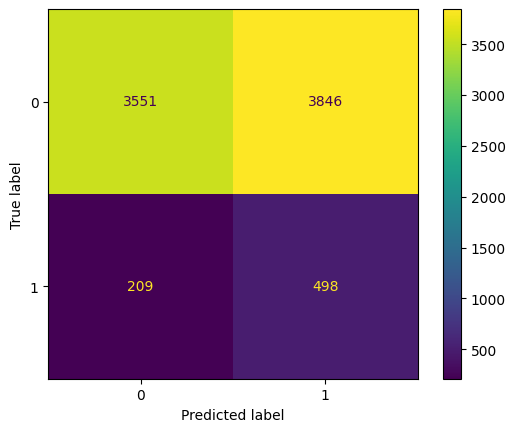

In [131]:
print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);  # , para graficar


Entonces nota que aquí está nuestro modelo final ya probado con datos que nunca vio, lo entrenamos siguiendo las mejores prácticas, trabajamos lógicamente con un modelo de undersampling. O sea todo siguiendo todos estos patrones y llegamos entonces a este modelo interesante que logra predecir de forma correcta, 496 casos en los cuales se trata de un cliente moroso.

Entonces trajimos nuestra Y_test y nota que nuestro resultado de recall, que es la métrica que queríamos priorizar aquí de la clase, que son morosos fue del 70%, entonces encuentra todo dentro de este rango, dentro de este intervalo de confianza, 70% y desde luego pues sacrificamos la precisión, quedó con precisión del 11%. ¿Cuál es el tradeoff?

Vuelvo a repetir, la idea de la empresa era dejar de perder dinero con clientes morosos porque no los estaban identificando correctamente. Ahora, están identificando correctamente a los clientes morosos, pero a cambio, podrían terminar prediciendo que clientes que son posiblemente buenos pagadores sean morosos. Por eso, estoy teniendo esta cantidad de falsos positivos, ¿ok?

Para la empresa, esto representa lógicamente un riesgo que va a asumir. La idea es que no vamos a prestar a tantas personas, ¿verdad? No vamos a financiar a tantas personas, pero a cambio, nos aseguraremos de identificar a los morosos antes de conocer las características de estos clientes morosos antes de prestarles. Vamos a proceder con pasos un poco más seguros aquí, trabajando con este modelo de Machine Learning (Aprendizaje Automático) para identificar a clientes morosos.

###**Otros métodos de balanceo**

Exploramos dos estrategias de balanceo de datos: oversampling y undersampling. En cada una de ellas utilizamos un algoritmo diferente, el SMOTE para generar nuevos datos sintéticos y el NearMiss para mantener datos que tienen un patrón cercano entre las clases.

Estos no son los únicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos.

Como desafío, utiliza el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

Como un consejo, revisa la documentación del método SMOTEENN a partir de este enlace https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html  para identificar cómo importar el método y cómo utilizarlo.